https://colab.research.google.com/drive/1qiXZcPVrCUXaF3jtJgWl4tOXfLc09RqX?usp=sharing

# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости наших экспериментов.\n\
Так как при генерации новых случайных чисел метрики модели, \n\
обученной и провалидированной на новых данных вероятнее всего будут отличаться.")

Для воспроизводимости наших экспериментов.
Так как при генерации новых случайных чисел метрики модели, 
обученной и провалидированной на новых данных вероятнее всего будут отличаться.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# your code here
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# your code here
df_train.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

Ответ: И в трейне и в тесте есть пропуски по колонкам *mileage, engine, max_power, torque, seats.*

In [8]:
# your code here
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

Ответ: 640 объектов, у которых есть дубли

In [10]:
# your code here
df_train.drop('selling_price', axis=1)[df_train.drop('selling_price', axis=1).duplicated].drop_duplicates().shape

(640, 12)

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

Например, 6 объектов, у которых есть дубли

In [11]:
# your code here
df_train.drop('selling_price', axis=1)[df_train.drop('selling_price', axis=1).duplicated(keep=False)].sort_values('name').head(6)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [12]:
df_train.columns.drop('selling_price')

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'],
      dtype='object')

In [13]:
# your code here
df_train.drop_duplicates(
    subset=df_train.columns.drop('selling_price'),
    keep='first', inplace=True, ignore_index=False
    )

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
# your code here
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [16]:
# your code here

In [17]:
def torque(x):
    ''' Extract value of torque and convert it to Nm '''
    val = str(x).lower()
    if 'kgm' in val:
        val_spl = val.replace(',', '.')
        reg = re.findall(r'(\d+[.,]*\d*)', val_spl)[0]
        res = float(reg) * 9.80665
    elif ('nm' in val) or (val != 'nan'):
        val_spl = val.replace(',', '.')
        reg = re.findall(r'(\d+[.,]*\d*)', val_spl)[0]
        res = float(reg)
    else:
        res = np.nan

    return res

In [18]:
def torque_rpm(x):
    ''' Extract value of rounds per minute '''
    val = str(x).lower()
    if val != 'nan':
        reg = re.findall(r'(\d+)', val)[-1]
        res = float(reg)
    else:
        res = np.nan

    return res

In [19]:
df_train['mileage'] = df_train['mileage'].astype(str).str.extract(r'(\d+[.,]*\d*)').astype(float)
df_train['engine'] = df_train['engine'].astype(str).str.extract(r'(\d+[.,]*\d*)').astype(float)
df_train['max_power'] = df_train['max_power'].astype(str).str.extract(r'(\d+[.,]*\d*)').astype(float)
df_train['torque_nm'] = df_train['torque'].apply(torque)
df_train['torque_rpm'] = df_train['torque'].apply(torque_rpm)

In [20]:
df_test['mileage'] = df_test['mileage'].astype(str).str.extract(r'(\d+[.,]*\d*)').astype(float)
df_test['engine'] = df_test['engine'].astype(str).str.extract(r'(\d+[.,]*\d*)').astype(float)
df_test['max_power'] = df_test['max_power'].astype(str).str.extract(r'(\d+[.,]*\d*)').astype(float)
df_test['torque_nm'] = df_test['torque'].apply(torque)
df_test['torque_rpm'] = df_test['torque'].apply(torque_rpm)

In [21]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5656 non-null   float64
 11  seats          5654 non-null   float64
 12  torque_nm      5653 non-null   float64
 13  torque_rpm     5653 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    float64
 9   engine         981 non-null    float64
 10  max_power      981 non-null    float64
 11  seats          981 non-null    float64
 12  torque_nm      981 non-null    float64
 13  torque_rpm     981 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [24]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torque_nm', 'torque_rpm'],
      dtype='object')

In [25]:
cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'torque_rpm']
target = ['selling_price']

In [26]:
# your code here
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df_train[numeric_features])
df_train[numeric_features] = imp.transform(df_train[numeric_features])
df_test[numeric_features] = imp.transform(df_test[numeric_features])

In [27]:
# сохраним в pickle
import pickle

pkl_filename = "imputer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(imp, file)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [28]:
print("Seats будет лучше в качестве категориальной переменной для линейной модели,\n\
так как у нее не будет ни прямой, ни обратной линейной зависимости с целевой переменной и,\n\
например, автомобили с 5 сиденьями - обычные, а вот с 2 сиденьями или с 7 дороже.")

Seats будет лучше в качестве категориальной переменной для линейной модели,
так как у нее не будет ни прямой, ни обратной линейной зависимости с целевой переменной и,
например, автомобили с 5 сиденьями - обычные, а вот с 2 сиденьями или с 7 дороже.


In [29]:
# your code here
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_train['torque_rpm'] = df_train['torque_rpm'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)
df_test['torque_rpm'] = df_test['torque_rpm'].astype(int)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   float64
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   float64
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
 12  torque_nm      5840 non-null   float64
 13  torque_rpm     5840 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 638.9+ KB


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   float64
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   float64
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
 12  torque_nm      1000 non-null   float64
 13  torque_rpm     1000 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 109.5+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.pairplot()`` позволяет сделать это в одну строчку

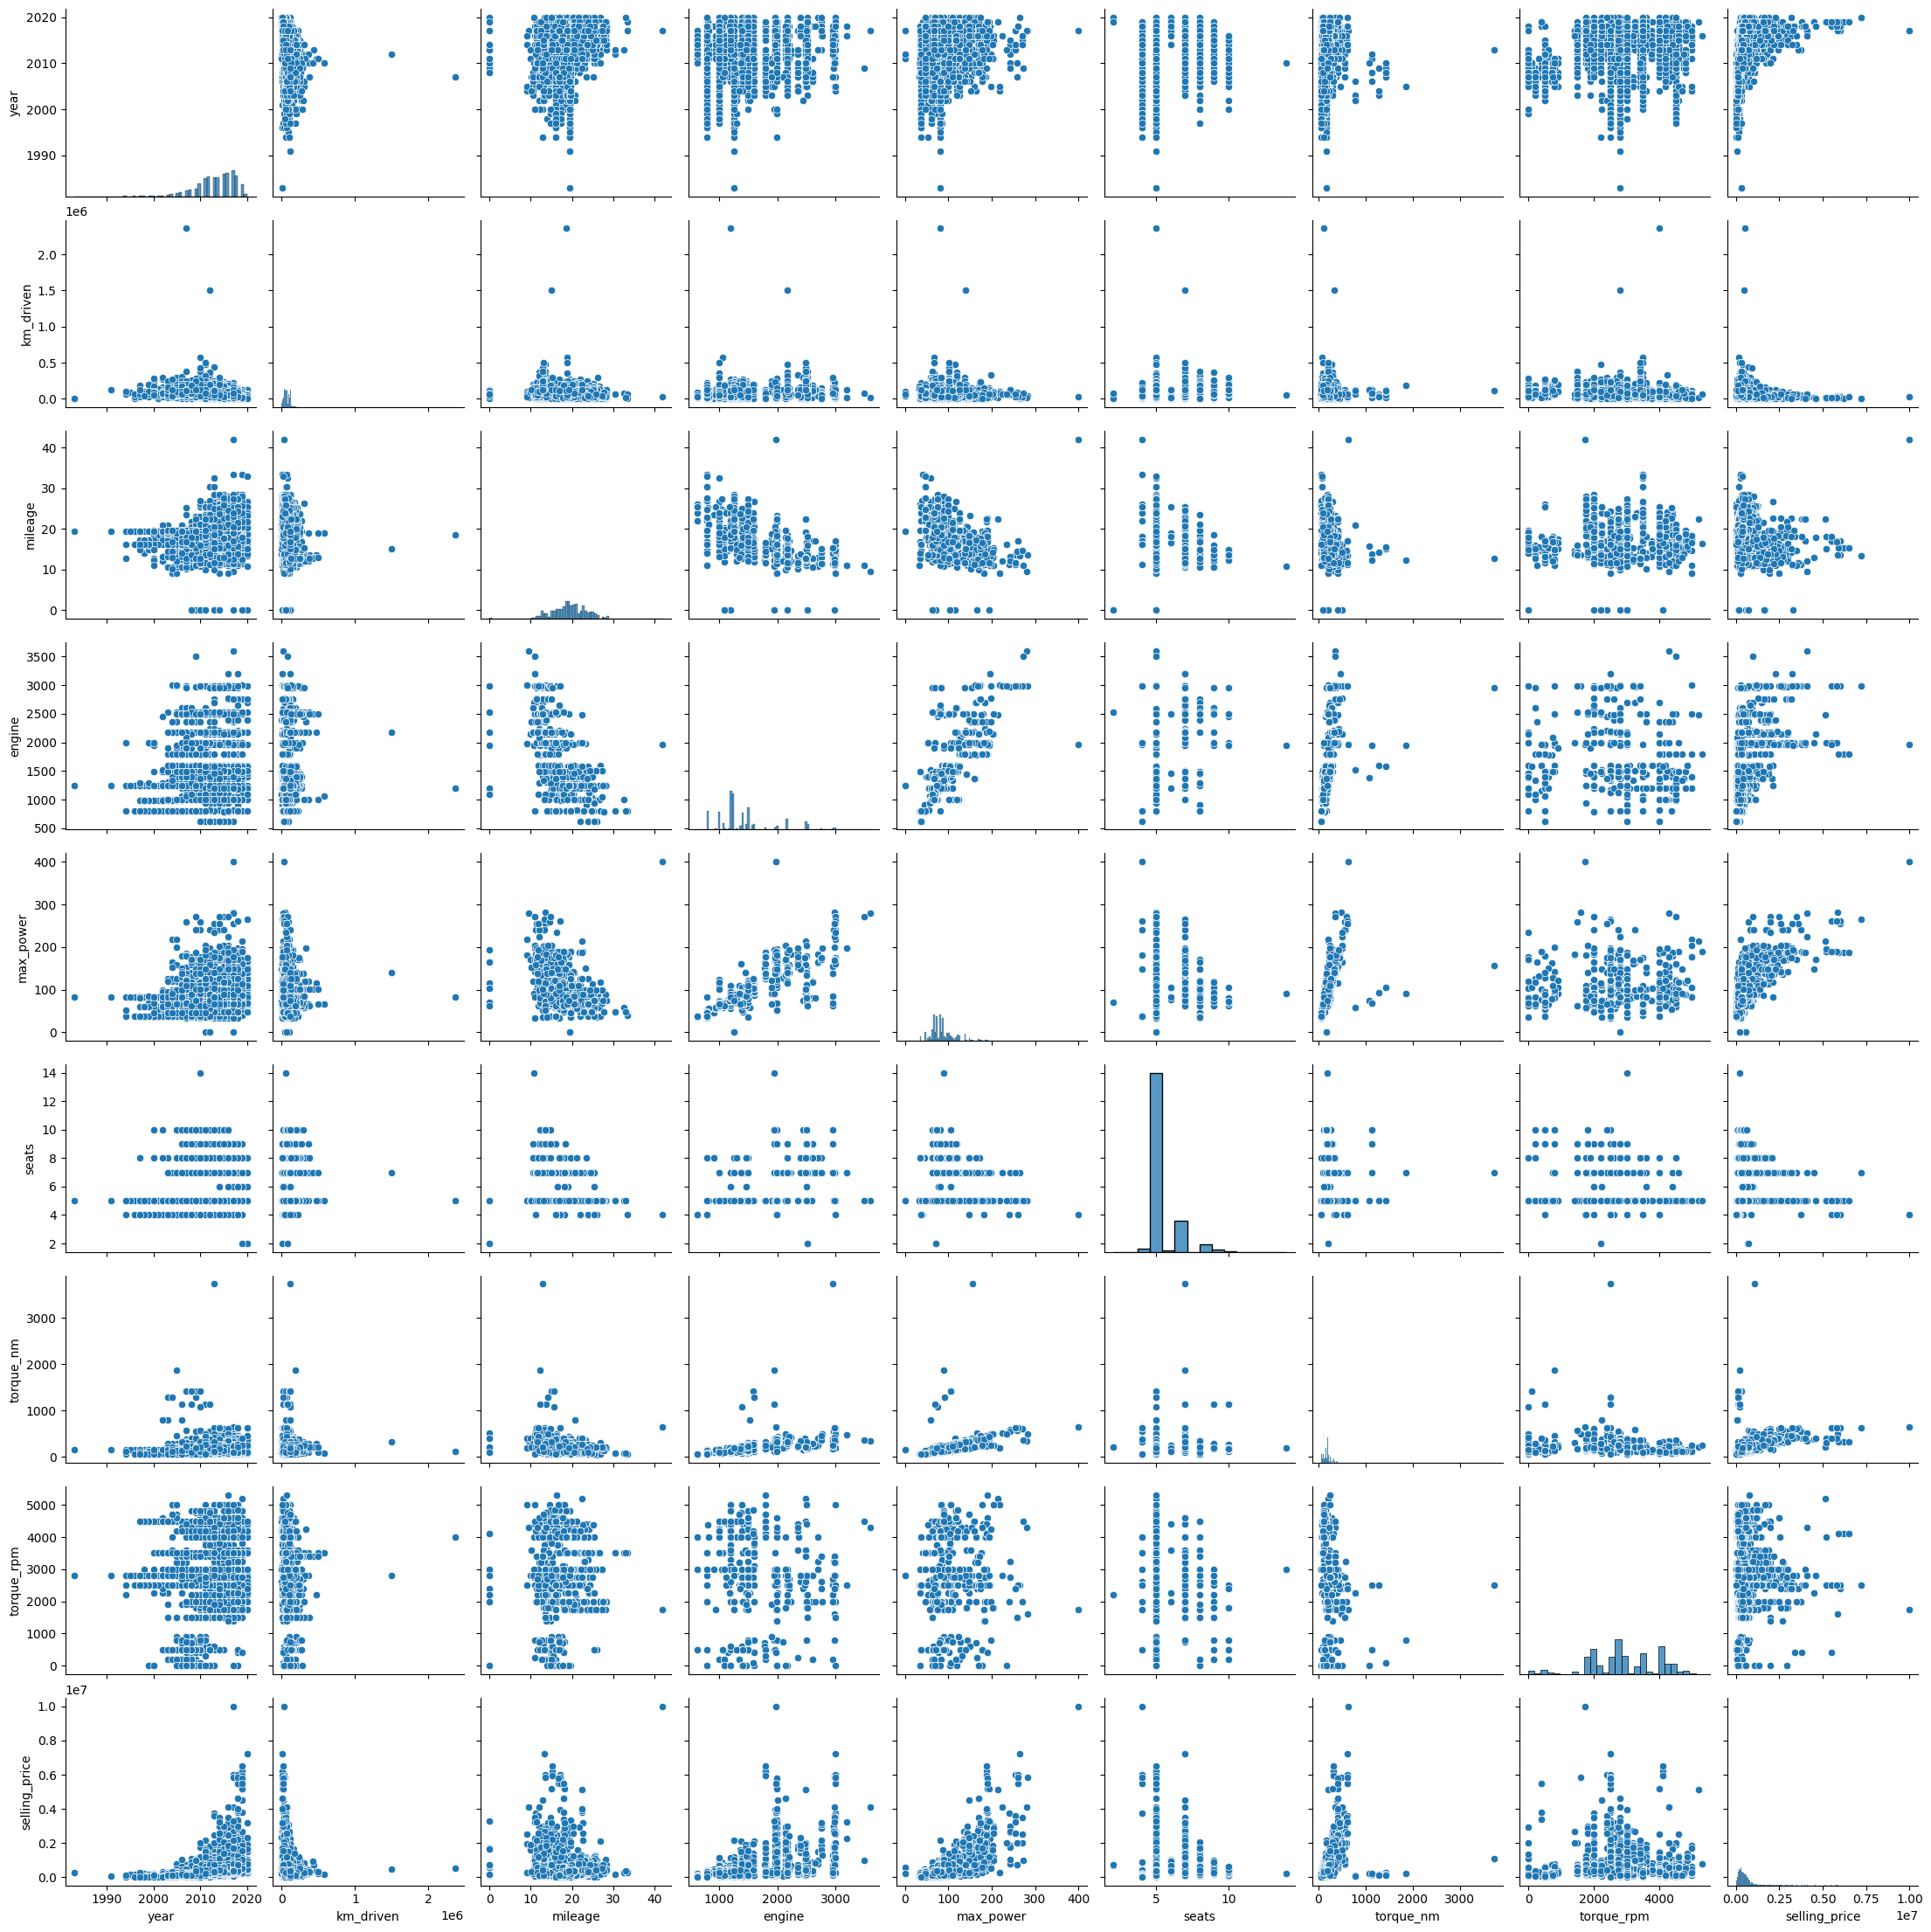

In [32]:
# your code here
sns.pairplot(df_train[numeric_features + target])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

*Ответ:*  
Рассматриваемые вещественные предикторы в основном распределены нормально.

С целевой переменной больше всего видна корреляция у max_power и torque_nm. А признаки year и km_driven рисуют экспоненту при построении попарного распределения с таргетом. То есть при совмещении с другими признаками, они датут хороший вклад.

Между max_power, engine, torque_nm - прослеживается корреляция по графикам.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

*Ответ:*  
Совокупности оказались близкими друг к другу по распределению и связи с таргетом, но из-за меньшего числа объектов, какие-то части графиков могут смещаться визуально.

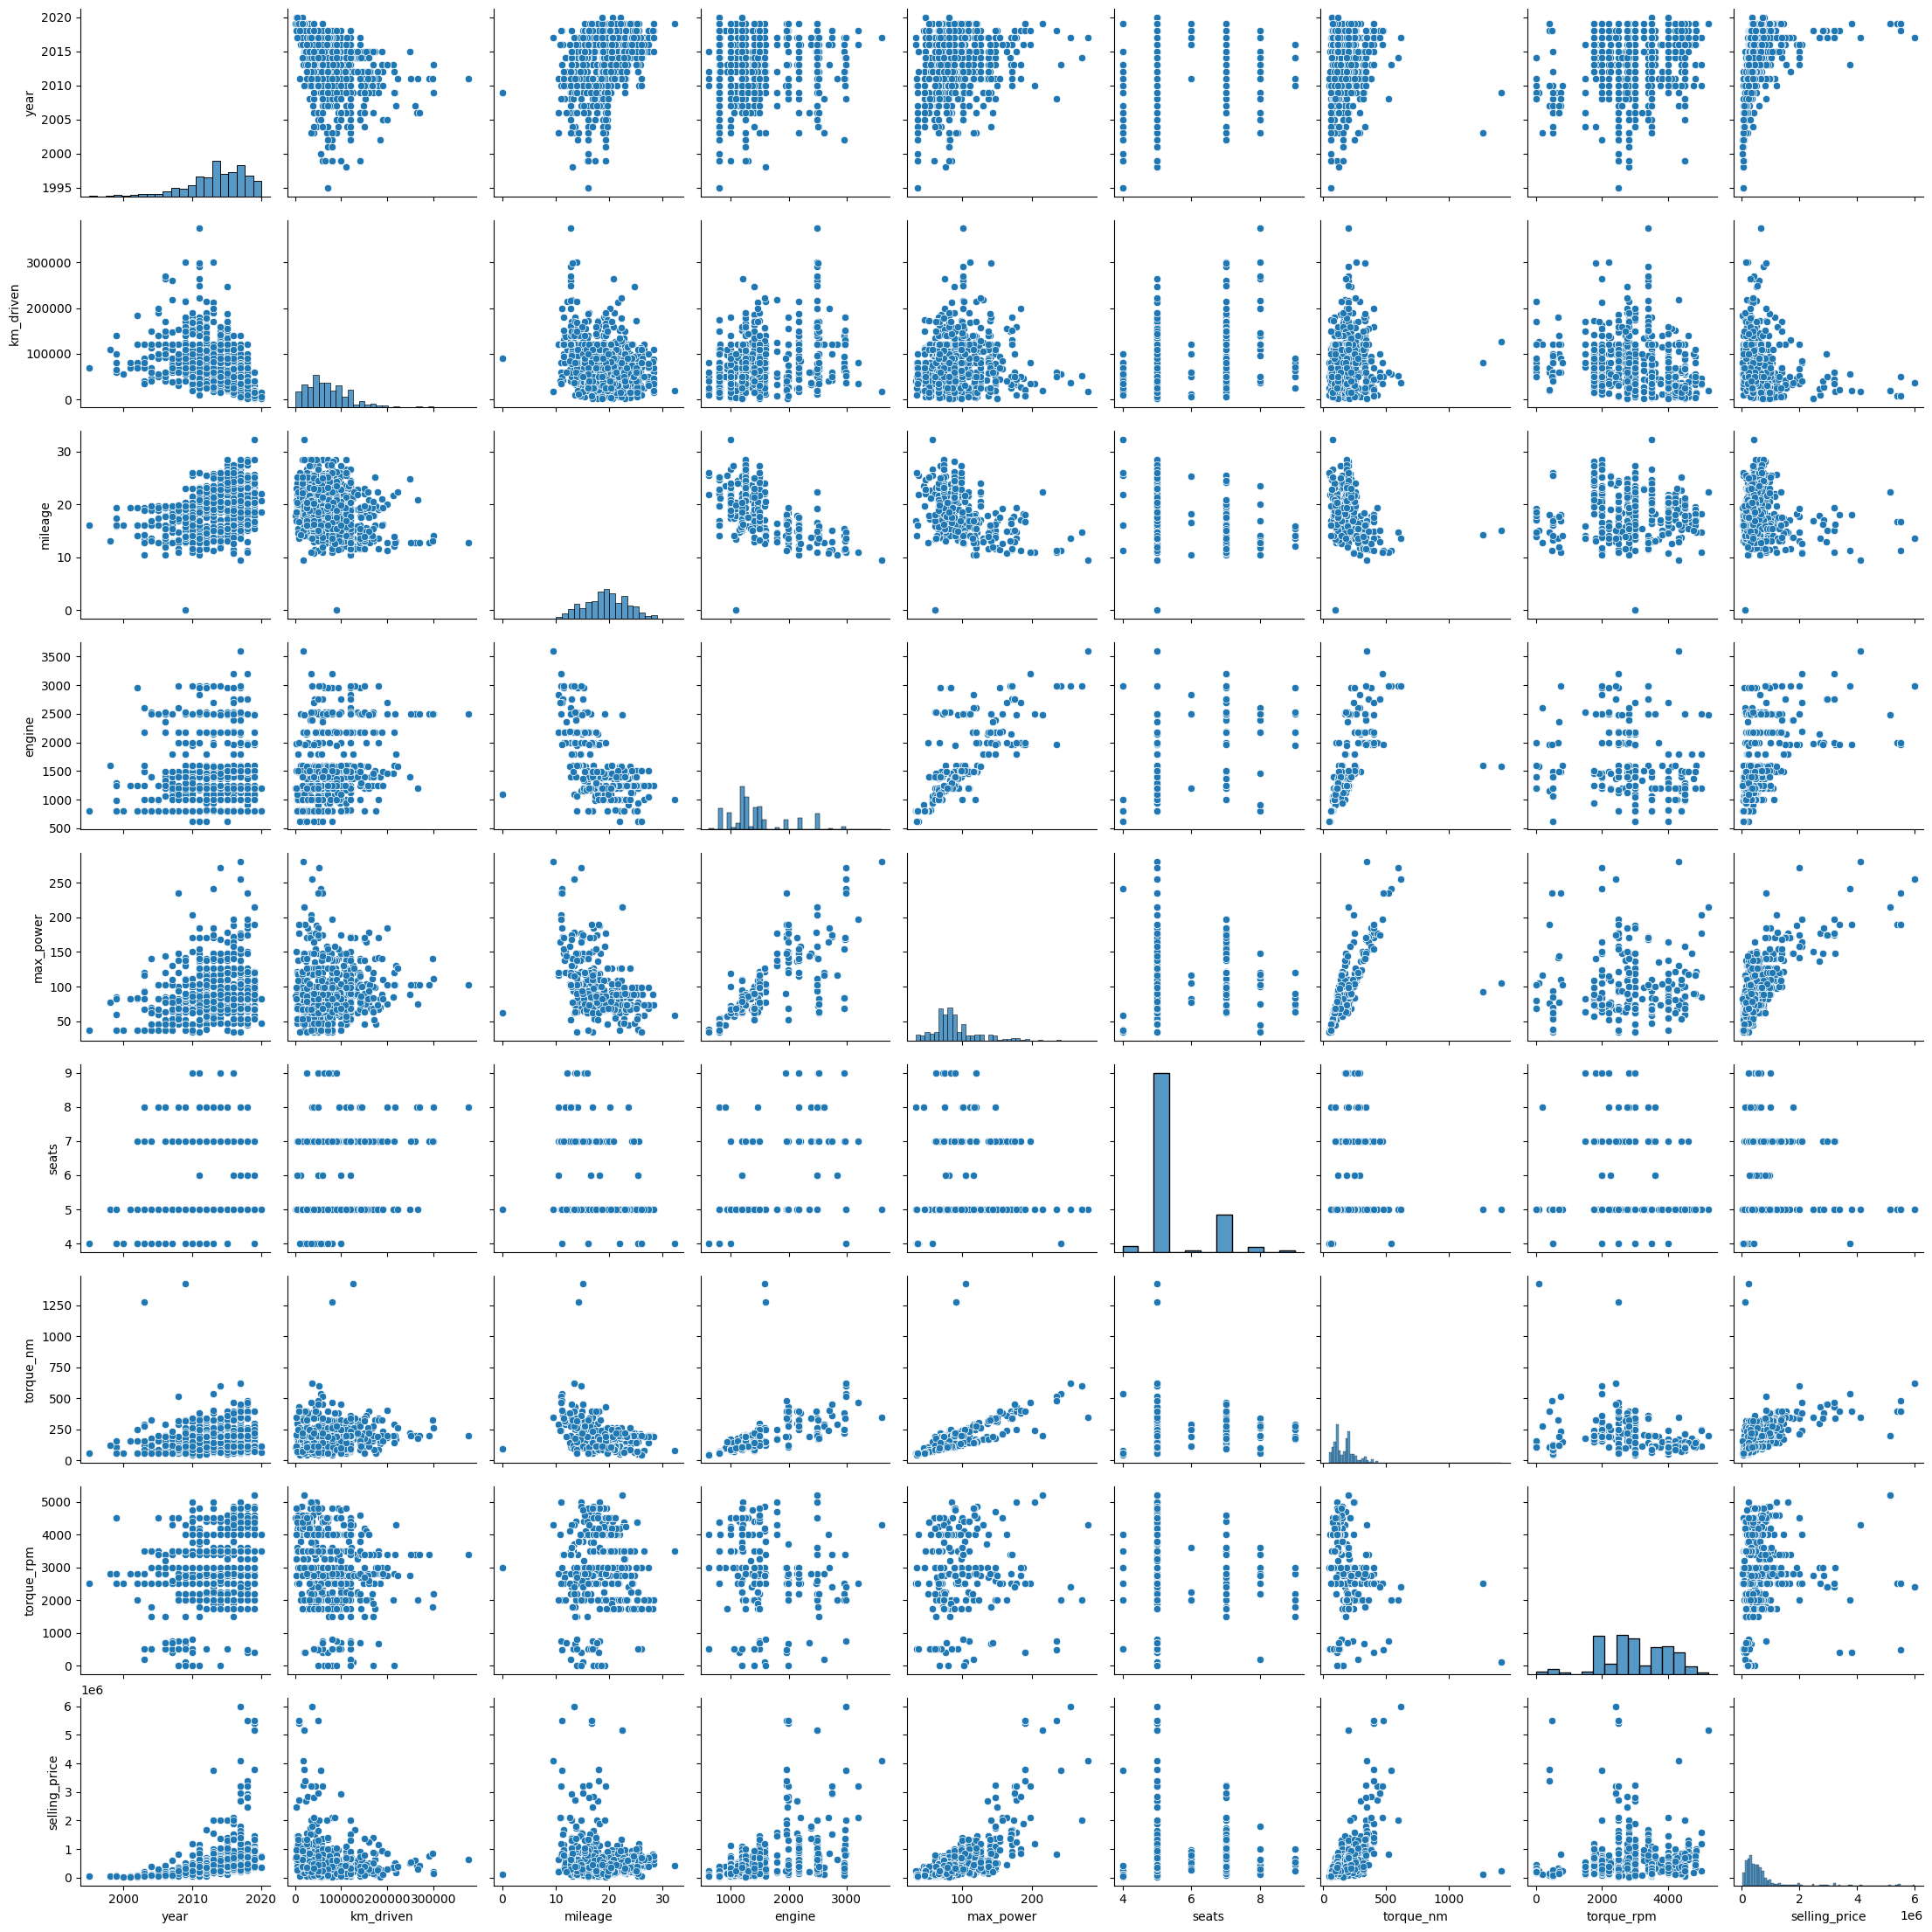

In [33]:
# your code here
sns.pairplot(df_test[numeric_features + target])

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

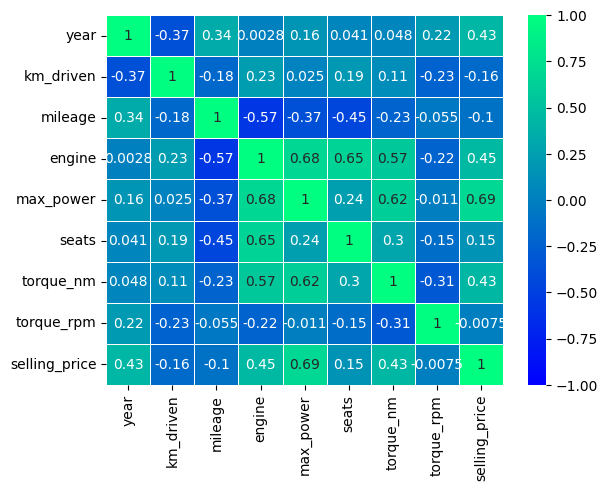

In [34]:
# your code here
sns.heatmap(df_train[numeric_features + target].corr(),
            vmax=1, vmin=-1, cmap='winter', annot=True, linewidth=.5)

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

*Ответ:*  
- Наименее скоррелированы между собой engine и year, но если учесть добавленные мною в доп. задании torque_rpm, то наименьшая корреляция у torque_rpm и таргетом + у torque_rpm и max_power.
- У max_power и engine наблюдается самая сильная положительная линейная зависимость. Сильнее здесь только max_power и таргет.
- Утверждение про то, что чем меньше год, тем скорее всего больше пробег у авто - верно. Наблюдается обратная корреляция, на графике она также заметна.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='max_power', ylabel='engine'>

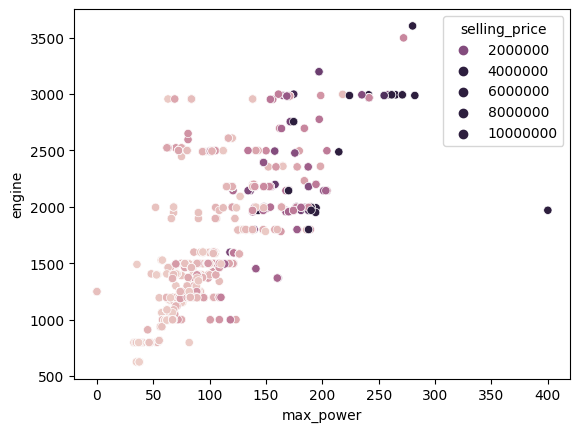

In [35]:
# your code here
sns.scatterplot(data=df_train, x='max_power', y='engine',
                hue='selling_price', hue_norm=(0, 3000000))

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

*Ответ:*  
При добавлении фичи torque_nm образуется еще одна сильная линейная зависимость между двумя признаками - это torque_nm и max_power. Так как все эти фичи показывают пиковую мощность авто, то они конечно сильно зависимы. Нарисуем их и также посмотрим на зависимость целевой переменной от них.  

Видим некоторый шум в данных (выбросы), если ды не они, то эта пара была бы самой сильноскоррелированной.

<Axes: xlabel='max_power', ylabel='torque_nm'>

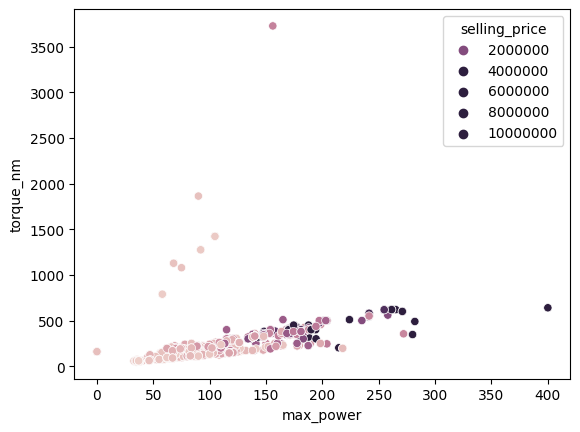

In [36]:
# your code here
sns.scatterplot(data=df_train, x='max_power', y='torque_nm',
                hue='selling_price', hue_norm=(0, 3000000))

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [37]:
# your code here
y_train = df_train[target]
X_train = df_train[numeric_features]

In [38]:
assert X_train.shape == (5840, 8)

In [39]:
y_test = df_test[target]
X_test = df_test[numeric_features]

In [40]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
lr_model_num_only = LinearRegression()
lr_model_num_only.fit(X_train, y_train)

LinearRegression()

In [42]:
lr_model_num_only_pred = lr_model_num_only.predict(X_test)

In [43]:
print('r2_score:', r2_score(y_test, lr_model_num_only_pred))
print('MSE:', MSE(y_test, lr_model_num_only_pred))

r2_score: 0.5998399096139135
MSE: 230023446780.78345


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [44]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [45]:
lr_model_num_only_st = LinearRegression()
lr_model_num_only_st.fit(X_train_st, y_train)

lr_model_num_only_st_pred = lr_model_num_only_st.predict(X_test_st)

print('r2_score:', r2_score(y_test, lr_model_num_only_st_pred))
print('MSE:', MSE(y_test, lr_model_num_only_st_pred))

r2_score: 0.5998399096139159
MSE: 230023446780.7821


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

*Ответ:*  
Признак max_power сильнее всех влияет на результат  
(самый информативный для предсказания цены).

In [46]:
# your code here

for i in range(len(numeric_features)):
    print(numeric_features[i], 'coef =', list(lr_model_num_only_st.coef_[0])[i])

year coef = 166314.00816259664
km_driven coef = -46990.14571160049
mileage coef = 9952.262357123393
engine coef = 37979.84579332206
max_power coef = 328382.16371293424
seats coef = -24609.53624122904
torque_nm coef = 1650.1497940022173
torque_rpm coef = -41535.259615272545


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [57]:
from sklearn.linear_model import Lasso

# your code here
lasso_model_num_only_st = Lasso()
lasso_model_num_only_st.fit(X_train_st, y_train)

lasso_model_num_only_st_pred = lasso_model_num_only_st.predict(X_test_st)

print('r2_score:', r2_score(y_test, lasso_model_num_only_st_pred))
print('MSE:', MSE(y_test, lasso_model_num_only_st_pred))

r2_score: 0.5998386855419251
MSE: 230024150412.3165


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

L1 регуляризация с параметрами по умолчанию не занулила веса, так как при дефолтном альфа = 1 и имеющейся функции потерь, видимо, точка касания регуляризатора и функции потерь произошла не на оси, где какой-то вес превратился бы в 0. Для этого нужно сильно менять альфа.

In [58]:
# your code here

for i in range(len(numeric_features)):
    print(numeric_features[i], 'coef =', list(lasso_model_num_only_st.coef_)[i])

year coef = 166313.6081470967
km_driven coef = -46988.986073506436
mileage coef = 9950.739208526105
engine coef = 37975.61628012048
max_power coef = 328382.9323879887
seats coef = -24606.70735946637
torque_nm coef = 1649.9975927889743
torque_rpm coef = -41534.54148039584


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [59]:
from sklearn.model_selection import GridSearchCV

# your code here
parameters = {
    'alpha': [10, 100, 1000, 10000, 100000]
}
gs_lasso_st = GridSearchCV(
    Lasso(),
    parameters,
    cv = 3,
    scoring = 'neg_mean_squared_error'
    )

gs_lasso_st.fit(X_train_st, y_train)

gs_lasso_st_pred = gs_lasso_st.predict(X_test_st)

print('r2_score:', r2_score(y_test, gs_lasso_st_pred))
print('MSE:', MSE(y_test, gs_lasso_st_pred))

print(gs_lasso_st.best_params_)

r2_score: 0.5985789085771929
MSE: 230748306185.38013
{'alpha': 1000}


In [65]:
gs_lasso_st.

{'alpha': [10, 100, 1000, 10000, 100000]}

In [62]:
from sklearn.model_selection import GridSearchCV

# your code here
parameters = {
    'alpha': np.arange(900, 1500, 100)
}
gs_lasso_st_min = GridSearchCV(
    Lasso(),
    parameters,
    cv = 5,
    scoring = 'neg_mean_squared_error'
    )

gs_lasso_st_min.fit(X_train_st, y_train)

gs_lasso_st_min_pred = gs_lasso_st_min.predict(X_test_st)

print('r2_score:', r2_score(y_test, gs_lasso_st_min_pred))
print('MSE:', MSE(y_test, gs_lasso_st_min_pred))

print(gs_lasso_st_min.best_params_)

r2_score: 0.5980667046744603
MSE: 231042735614.98032
{'alpha': 1400}


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

*Ответ:*  
5 * 3 (cross val) = 15 моделей (там где alpha в диапазоне от 10 до 100 000)

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

*Ответ:*  
alpha = 1000 лучшая на данный момент

*Ответ:*  
При текущем параметре alpha веса также не занулились

In [66]:
len(gs_lasso_st.cv_results_['params'])

5

In [68]:
gs_lasso_st.best_estimator_.coef_

array([165843.39749218, -45825.74330802,   8476.76924804,  33625.65237323,
       329204.99013543, -21697.76371926,   1536.79793656, -40800.72402894])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [75]:
from sklearn.linear_model import ElasticNet

# your code here
parameters = {
    'alpha': np.arange(0, 1000, 100),
    'l1_ratio': np.arange(0, 1, 0.1)
}
gs_eln_st = GridSearchCV(
    ElasticNet(),
    parameters,
    cv = 4,
    scoring = 'neg_mean_squared_error'
    )

gs_eln_st.fit(X_train_st, y_train)

gs_eln_st_pred = gs_eln_st.predict(X_test_st)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+14, tolerance: 1.072e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

In [76]:
print('r2_score:', r2_score(y_test, gs_eln_st_pred))
print('MSE:', MSE(y_test, gs_eln_st_pred))

print(gs_eln_st.best_params_)

r2_score: 0.599839909613916
MSE: 230023446780.782
{'alpha': 0, 'l1_ratio': 0.0}


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Лучшей модели соответствуют гипермараметры alpha = 0 и l1_ratio = 0, как в обычной модели без регуляризации

In [73]:
# your code here
gs_eln_st.best_params_

{'alpha': 0, 'l1_ratio': 0.0}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

In [85]:
# Хочу улучшать модели уже с использованием всех фичей
eln_model = ElasticNet(alpha=0.01, l1_ratio=0.5)

eln_model.fit(X_train_st, y_train)

eln_model_pred = eln_model.predict(X_test_st)
print('r2_score:', r2_score(y_test, eln_model_pred))
print('MSE:', MSE(y_test, eln_model_pred))

r2_score: 0.598632450144741
MSE: 230717528963.43985


Кажется, без регуляризации регрессия справляется лучше

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [86]:
numeric_features_new = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque_nm', 'torque_rpm']

In [87]:
# your code here
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

new_scaler = StandardScaler()
new_scaler.fit(X_train_cat[numeric_features_new])
X_train_cat[numeric_features_new] = new_scaler.transform(X_train_cat[numeric_features_new])
X_test_cat[numeric_features_new] = new_scaler.transform(X_test_cat[numeric_features_new])

In [88]:
assert X_train_cat.shape == (5840, 12)

In [89]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [90]:
cat_features_new = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [91]:
X_train_cat[cat_features_new]

,fuel,seller_type,transmission,owner,seats
0,Diesel,Individual,Manual,First Owner,5
1,Diesel,Individual,Manual,Second Owner,5
2,Diesel,Individual,Manual,First Owner,5
3,Petrol,Individual,Manual,First Owner,5
4,Petrol,Individual,Manual,First Owner,5
...,...,...,...,...,...
5835,Petrol,Individual,Manual,First Owner,5
5836,Petrol,Individual,Manual,Second Owner,5
5837,Petrol,Individual,Manual,First Owner,5
5838,Diesel,Individual,Manual,Fourth & Above Owner,5


In [92]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder.fit(X_train_cat[cat_features_new])

X_train_cat_hot_only = pd.DataFrame.sparse.from_spmatrix(
    encoder.transform(X_train_cat[cat_features_new]),
    columns=encoder.get_feature_names_out()
    )

X_test_cat_hot_only = pd.DataFrame.sparse.from_spmatrix(
    encoder.transform(X_test_cat[cat_features_new]),
    columns=encoder.get_feature_names_out()
    )

In [93]:
X_train_cat = X_train_cat.drop(cat_features_new, axis=1).join(X_train_cat_hot_only)
X_test_cat = X_test_cat.drop(cat_features_new, axis=1).join(X_test_cat_hot_only)

In [94]:
X_train_cat

,year,km_driven,mileage,engine,max_power,torque_nm,torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.120512,-0.869673,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.634441,-0.388098,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.374641,-0.147311,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.540945,-2.314398,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.532606,1.056627,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,-0.683787,0.093477,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,-0.736036,0.575052,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,-0.533034,1.056627,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,-1.569719,0.749971,-0.660081,0.130865,0.698332,0.509039,-2.073611,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
X_test_cat

,year,km_driven,mileage,engine,max_power,torque_nm,torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,-0.837167,1.565740,-1.362605,2.200379,0.761548,0.720096,-0.677043,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.872122,-0.814974,0.519155,0.139102,0.650920,0.720096,-0.147311,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.569719,2.405866,-1.638596,0.760986,1.330489,-0.033666,1.345572,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.383754,1.648982,1.422399,0.141162,0.338003,0.206167,-1.110461,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.592983,-0.065798,-0.735352,-0.530144,-0.724021,-0.684643,0.093477,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.325535,0.433652,0.095132,-0.707236,-0.627617,-0.658604,1.538202,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.872122,-0.398765,-0.208459,-0.478663,-0.192061,-0.524469,1.056627,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,-1.081351,-0.565249,0.895506,-0.068879,0.066175,0.374641,-0.147311,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,-0.348799,-0.814974,0.233127,-0.478663,-0.284672,-0.549309,1.056627,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [96]:
from sklearn.linear_model import Ridge

# your code here
parameters = {
    'alpha': np.arange(0, 10, 0.1)
}
gs_ridge = GridSearchCV(
    Ridge(),
    parameters,
    cv = 4,
    scoring = 'neg_mean_squared_error'
    )

gs_ridge.fit(X_train_cat, y_train)

gs_ridge_pred = gs_ridge.predict(X_test_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [97]:
print('r2_score:', r2_score(y_test, gs_ridge_pred))
print('MSE:', MSE(y_test, gs_ridge_pred))

r2_score: 0.6492480084232858
MSE: 201622260705.35043


In [98]:
print(gs_ridge.best_params_)

{'alpha': 6.7}


Попробуем подобрать гиперпараметр альфа в найденном диапазоне от 6.6 до 6.8

In [99]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
parameters = {
    'alpha': np.arange(6.6, 6.8, 0.001)
}
gs_ridge = GridSearchCV(
    Ridge(),
    parameters,
    cv = 3,
    scoring = 'neg_mean_squared_error'
    )

gs_ridge.fit(X_train_cat, y_train)

gs_ridge_pred = gs_ridge.predict(X_test_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [100]:
print('r2_score:', r2_score(y_test, gs_ridge_pred))
print('MSE:', MSE(y_test, gs_ridge_pred))

r2_score: 0.6491928125600988
MSE: 201653988863.66345


In [101]:
print(gs_ridge.best_params_)

{'alpha': 6.6}


*Ответ:*  
Метрики почти не изменились, а если смотреть 7ые знаки после запятой, то просели :)  
Оставлем эталоном альфа равную 6.7

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [102]:
# your code here
# начнем с плюс минус того варианта, который отработали в EDA (пропуски заполнены медианой)
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,Maruti Swift Dzire VDI,2014.0,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.00000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.00000,2500
2,Hyundai i20 Sportz Diesel,2010.0,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.66896,2750


In [103]:
print(df_train['name'].to_list())

['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition', 'Hyundai i20 Sportz Diesel', 'Maruti Swift VXI BSIII', 'Hyundai Xcent 1.2 VTVT E Plus', 'Maruti Wagon R LXI DUO BSIII', 'Maruti 800 DX BSII', 'Toyota Etios VXD', 'Ford Figo Diesel Celebration Edition', 'Renault Duster 110PS Diesel RxL', 'Maruti Zen LX', 'Maruti Swift Dzire VDi', 'Maruti Swift 1.3 VXi', 'Maruti Wagon R LXI Minor', 'Mahindra KUV 100 mFALCON G80 K8 5str', 'Hyundai i20 1.4 CRDi Asta', 'Maruti Alto LX', 'Hyundai i20 2015-2017 Asta 1.4 CRDi', 'Mahindra Verito 1.5 D4 BSIII', 'Honda WR-V i-DTEC VX', 'Maruti Swift Dzire ZDI', 'Maruti SX4 ZDI', 'Maruti Baleno Delta 1.2', 'Maruti Alto 800 LXI', 'Chevrolet Enjoy TCDi LTZ 7 Seater', 'Maruti Wagon R LXI Minor', 'Maruti Omni E MPI STD BS IV', 'Maruti Vitara Brezza LDi Option', 'Fiat Palio 1.2 ELX', 'Maruti Omni 8 Seater BSIV', 'Maruti Vitara Brezza LDi', 'Maruti Alto 800 CNG LXI Optional', 'Maruti Alto K10 VXI Airbag', 'Hyundai Verna VTVT 1.6 SX Option', 'Datsun GO D', 'Tata 

In [104]:
# возьмем марку машину из поля name
df_train['brand'] = df_train['name'].apply(lambda x: str(x).split(' ')[0])
df_test['brand'] = df_test['name'].apply(lambda x: str(x).split(' ')[0])

Уникальных значений брэндов не очень много.  
Разметим их вручную.  
Добавим признак класса автомобильного брэнда.

In [105]:
all_brands_lst = list(
    set(df_train['brand'].drop_duplicates().to_list()) | \
        set(df_test['brand'].drop_duplicates().to_list())
)

In [106]:
for el in all_brands_lst:
    print(f"brand_dic['{el}'] = ''")

brand_dic['Tata'] = ''
brand_dic['Fiat'] = ''
brand_dic['Opel'] = ''
brand_dic['Volvo'] = ''
brand_dic['Chevrolet'] = ''
brand_dic['Lexus'] = ''
brand_dic['Peugeot'] = ''
brand_dic['Audi'] = ''
brand_dic['Maruti'] = ''
brand_dic['Honda'] = ''
brand_dic['Volkswagen'] = ''
brand_dic['Ambassador'] = ''
brand_dic['Mahindra'] = ''
brand_dic['Datsun'] = ''
brand_dic['Jeep'] = ''
brand_dic['Hyundai'] = ''
brand_dic['BMW'] = ''
brand_dic['Ashok'] = ''
brand_dic['Daewoo'] = ''
brand_dic['Force'] = ''
brand_dic['Kia'] = ''
brand_dic['Mitsubishi'] = ''
brand_dic['Isuzu'] = ''
brand_dic['Renault'] = ''
brand_dic['Toyota'] = ''
brand_dic['Nissan'] = ''
brand_dic['MG'] = ''
brand_dic['Mercedes-Benz'] = ''
brand_dic['Ford'] = ''
brand_dic['Land'] = ''
brand_dic['Skoda'] = ''
brand_dic['Jaguar'] = ''


In [107]:
brand_dic = dict()
brand_dic['Datsun'] = 'medium'
brand_dic['Chevrolet'] = 'high'
brand_dic['Hyundai'] = 'high'
brand_dic['Nissan'] = 'high'
brand_dic['Force'] = 'medium'
brand_dic['Toyota'] = 'high'
brand_dic['Land'] = 'premium'
brand_dic['Maruti'] = 'medium'
brand_dic['Daewoo'] = 'medium'
brand_dic['Jeep'] = 'high'
brand_dic['Tata'] = 'medium'
brand_dic['Fiat'] = 'medium'
brand_dic['Jaguar'] = 'premium'
brand_dic['Volvo'] = 'premium'
brand_dic['Renault'] = 'high'
brand_dic['Peugeot'] = 'high'
brand_dic['Opel'] = 'high'
brand_dic['Kia'] = 'high'
brand_dic['Ford'] = 'high'
brand_dic['MG'] = 'medium'
brand_dic['Mitsubishi'] = 'high'
brand_dic['Skoda'] = 'high'
brand_dic['Lexus'] = 'premium'
brand_dic['Audi'] = 'premium'
brand_dic['Mahindra'] = 'medium'
brand_dic['Ashok'] = 'medium'
brand_dic['Ambassador'] = 'medium'
brand_dic['Isuzu'] = 'medium'
brand_dic['Mercedes-Benz'] = 'premium'
brand_dic['Volkswagen'] = 'high'
brand_dic['Honda'] = 'high'
brand_dic['BMW'] = 'premium'

In [108]:
brands = list()
brand_cat = list()

for key, value in brand_dic.items():
    brands.append(key)
    brand_cat.append(value)

brand_dic = dict()
brand_dic['brand'] = brands
brand_dic['brand_class'] = brand_cat

In [109]:
brands_df = pd.DataFrame().from_dict(brand_dic)
brands_df.head(3)

,brand,brand_class
0,Datsun,medium
1,Chevrolet,high
2,Hyundai,high


In [110]:
brands_df.to_csv('brands_classes.csv', index=False, encoding='utf8')

In [111]:
df_train_new = (
    df_train.join(brands_df.set_index('brand'), ['brand'], 'left')
)

df_test_new = (
    df_test.join(brands_df.set_index('brand'), ['brand'], 'left')
)

In [112]:
df_train_new['brand_class'].value_counts()

medium     3054
high       2651
premium     135
Name: brand_class, dtype: int64

In [113]:
df_test_new['brand_class'].value_counts()

medium     498
high       464
premium     38
Name: brand_class, dtype: int64

In [114]:
df_train_new.drop('name', axis=1, inplace=True)
df_train_new.drop('brand', axis=1, inplace=True)

df_test_new.drop('name', axis=1, inplace=True)
df_test_new.drop('brand', axis=1, inplace=True)

In [115]:
df_train_new['torque_nm'] = df_train_new['torque_nm'].astype(int)
df_train_new['max_power'] = df_train_new['max_power'].astype(int)

df_test_new['torque_nm'] = df_test_new['torque_nm'].astype(int)
df_test_new['max_power'] = df_test_new['max_power'].astype(int)

In [116]:
# добавим возраст авто,допустим датасет был собран в 2021 году,
# так как самая молодая машина там 2020 года
df_train_new['car_age'] = df_train_new['year'].apply(lambda x: int(2021 - int(x)))
df_test_new['car_age'] = df_test_new['year'].apply(lambda x: int(2021 - int(x)))

In [117]:
# добавим квадрат возраста
df_train_new['age_sq'] = df_train_new['car_age'].apply(lambda x: x ** 2)
df_test_new['age_sq'] = df_test_new['car_age'].apply(lambda x: x ** 2)

In [118]:
df_train_new.drop('year', axis=1, inplace=True)
df_test_new.drop('year', axis=1, inplace=True)

In [119]:
# создадим выдуманную фичу, которая как будто может показать что-то о мощности
# связанное с оборотами в минуту, а сами обороты просто логорифмируем

df_train_new['combo_power'] = (
    df_train_new['engine'] / df_train_new['max_power'] * \
    df_train_new['torque_rpm'].apply(lambda x: np.log2(x))
).apply(lambda x: round(x, 8))

df_test_new['combo_power'] = (
    df_test_new['engine'] / df_test_new['max_power'] * \
    df_test_new['torque_rpm'].apply(lambda x: np.log2(x))
).apply(lambda x: round(x, 8))

df_train_new['torque_rpm_log'] = df_train_new['torque_rpm'].apply(lambda x: round(np.log2(x), 8))
df_test_new['torque_rpm_log'] = df_test_new['torque_rpm'].apply(lambda x: round(np.log2(x), 8))

In [120]:
# начнем приводить уже все в порядок
num_features_fe = [
    'km_driven', 'mileage', 'engine', 'max_power', 'torque_nm',
    'torque_rpm', 'car_age', 'age_sq', 'combo_power', 'torque_rpm_log'
    ]
cat_features_fe = [
    'fuel', 'seller_type', 'transmission', 'owner', 'brand_class', 'seats'
       ]

In [122]:
df_train_new = df_train_new[np.isfinite(df_train_new[num_features_fe]).all(1)]
df_test_new = df_test_new[np.isfinite(df_test_new[num_features_fe]).all(1)]

In [123]:
df_train_new.reset_index(drop=True, inplace=True)
df_test_new.reset_index(drop=True, inplace=True)

In [124]:
df_train_new.shape

(5750, 17)

In [125]:
df_test_new.shape

(991, 17)

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
X_train_fe = df_train_new.drop('selling_price', axis=1)
X_test_fe = df_test_new.drop('selling_price', axis=1)
y_train_fe = df_train_new[['selling_price']]
y_test_fe = df_test_new[['selling_price']]

In [128]:
poly = PolynomialFeatures(2)
poly.fit(X_train_fe[num_features_fe])
poly.transform(X_train_fe[num_features_fe])
poly.transform(X_test_fe[num_features_fe])

X_train_poly_only = pd.DataFrame(
    poly.transform(X_train_fe[num_features_fe]),
    columns=poly.get_feature_names_out()
    )

X_test_poly_only = pd.DataFrame(
    poly.transform(X_test_fe[num_features_fe]),
    columns=poly.get_feature_names_out()
    )

X_train_fe = X_train_fe.drop(num_features_fe, axis=1).join(X_train_poly_only)
X_test_fe = X_test_fe.drop(num_features_fe, axis=1).join(X_test_poly_only)

In [129]:
pkl_filename = "polynomials.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(poly, file)

In [130]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [131]:
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_fe[cat_features_fe])

X_train_cat_hot_only = pd.DataFrame.sparse.from_spmatrix(
    encoder.transform(X_train_fe[cat_features_fe]),
    columns=encoder.get_feature_names_out()
    )

X_test_cat_hot_only = pd.DataFrame.sparse.from_spmatrix(
    encoder.transform(X_test_fe[cat_features_fe]),
    columns=encoder.get_feature_names_out()
    )

X_train_fe = X_train_fe.drop(cat_features_fe, axis=1).join(X_train_cat_hot_only)
X_test_fe = X_test_fe.drop(cat_features_fe, axis=1).join(X_test_cat_hot_only)

In [132]:
pkl_filename = "ohencoder.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(encoder, file)

In [133]:
fe_scaler = StandardScaler()
fe_scaler.fit(X_train_fe[num_features_fe])
X_train_fe[num_features_fe] = fe_scaler.transform(X_train_fe[num_features_fe])
X_test_fe[num_features_fe] = fe_scaler.transform(X_test_fe[num_features_fe])

In [134]:
pkl_filename = "stscaler.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(fe_scaler, file)

In [135]:
X_train_fe.head(2)

,1,km_driven,mileage,engine,max_power,torque_nm,torque_rpm,car_age,age_sq,combo_power,...,brand_class_medium,brand_class_premium,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1.0,1.197902,0.984141,-0.372752,-0.435427,0.119247,-0.963737,-0.12378,-0.287328,-0.126827,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.773774,0.418344,0.139672,0.482354,0.633369,-0.454859,-0.12378,-0.287328,-0.517374,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
X_test_fe.head(2)

,1,km_driven,mileage,engine,max_power,torque_nm,torque_rpm,car_age,age_sq,combo_power,...,brand_class_medium,brand_class_premium,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1.0,1.572132,-1.369171,2.189367,0.767182,0.719056,-0.760186,0.857923,0.577639,1.052184,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,-0.806310,0.508471,0.137622,0.640592,0.719056,-0.200420,-0.860057,-0.683771,-0.626403,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
print(X_train_fe.shape)
print(X_test_fe.shape)

(5750, 86)
(991, 86)


Наш набор данных:  
`X_train_fe, y_train_fe, X_test_fe, y_test_fe`

In [138]:
# обучим на новых фичах модель линейной регрессии с регуляризацей L2

In [140]:
parameters = {
    'alpha': np.arange(0, 10, 0.1)
}

gs_ridge_fe = GridSearchCV(
    Ridge(),
    parameters,
    cv = 4,
    scoring = 'neg_mean_squared_error'
    )

gs_ridge_fe.fit(X_train_fe, y_train_fe)

gs_ridge_fe_pred = gs_ridge_fe.predict(X_test_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [141]:
print('r2_score:', r2_score(y_test_fe, gs_ridge_fe_pred))
print('MSE:', MSE(y_test_fe, gs_ridge_fe_pred))

r2_score: 0.9182444858715586
MSE: 47323454536.05908


In [142]:
print(gs_ridge_fe.best_params_)

{'alpha': 5.9}


In [144]:
pkl_filename = "model_gscv_ridge.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(gs_ridge_fe, file)

В общем добавил я фичей, метрики поднял.  
Можно было бы еще поиграться с фичами, но времени мало, а домашек много :(

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [145]:
def business_metrics(y_true, y_pred, round_digits_n):
    y_true_n = np.array(y_true)
    y_pred_n = np.array(y_pred)
    num_accurate_pred = sum(
        np.abs(
            (y_true_n - y_pred_n) / y_true_n * 100
            ) <= 10
        )[0]
    total_pred = y_true_n.shape[0]
    custom_accuracy = round(num_accurate_pred / total_pred, round_digits_n)

    return custom_accuracy

In [146]:
business_metrics(y_test_fe, gs_ridge_fe_pred, 4)

0.3068

Не думаю, что бизнес принял бы модель с такой метрикой )))  
Но благо мы только учимся

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link